In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the csv files
clean_2020_data = Path("output/clean_2020.csv")
clean_2023_data = Path("output/clean_2023.csv")

In [3]:
# Create dataframes from the imported csv files
clean_2020_df = pd.read_csv(clean_2020_data)
clean_2023_df = pd.read_csv(clean_2023_data)

In [4]:
# Display the cleaned 2020 dataframe
clean_2020_df.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
0,2595,2845,2,New York City,40.75362,-73.98377,Entire home/apt,175,3,365,48
1,3831,4869,1,New York City,40.68514,-73.95976,Entire home/apt,76,1,272,349
2,5121,7356,1,New York City,40.68688,-73.95596,Private room,60,29,365,50
3,5136,7378,1,New York City,40.66120,-73.99423,Entire home/apt,175,7,352,1
4,5178,8967,1,New York City,40.76489,-73.98493,Private room,79,2,346,473


In [5]:
# Display the cleaned 2023 dataframe
clean_2023_df.head()

,Listing ID,Host ID,Number of Listings Per Host,City,Latitude,Longitude,Listing Type,Price,Minimum Nights,Availability,Number of Reviews
0,958,1169,1,San Francisco,37.77028,-122.43317,Entire home/apt,202,2,128,383
1,5858,8904,1,San Francisco,37.74474,-122.42089,Entire home/apt,235,30,365,111
2,8142,21994,13,San Francisco,37.76555,-122.45213,Private room,56,32,365,9
3,8339,24215,2,San Francisco,37.77564,-122.43642,Entire home/apt,575,9,365,28
4,8739,7149,2,San Francisco,37.76030,-122.42197,Private room,110,1,159,770


## Creating and exporting plots

## Plotting average price for each city 2020

In [6]:
#create a new data frame that isolates price, listing type, and city 
bar_data_2020 = clean_2020_df[['City','Price','Listing Type']]

bar_data_2020.head()


,City,Price,Listing Type
0,New York City,175,Entire home/apt
1,New York City,76,Entire home/apt
2,New York City,60,Private room
3,New York City,175,Entire home/apt
4,New York City,79,Private room


In [7]:
#calculate the average price per city 
city_group_2020 = bar_data_2020.groupby("City")

price_avg_20 = city_group_2020.mean()

price_avg_20


,Price
City,
New York City,157.284077
San Francisco,202.765539
Twin Cities MSA,364.554844


NameError: name 'ax' is not defined

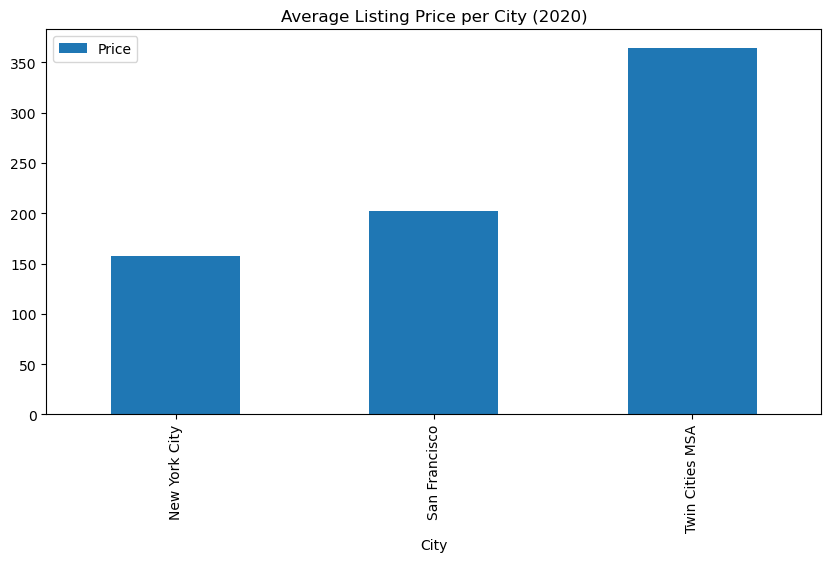

In [8]:
#plot the average price per city 
ax_20 = price_avg_20.plot(kind="bar", title = "Average Listing Price per City (2020)", figsize=(10,5))

ax_20.bar_label(ax.containers[0])

#save 
plt.savefig("images/fig1_2020.png")

plt.show()

## Average price for 2023

In [ ]:
#create a new data frame that isolates price, listing type, and city 
bar_data_2023 = clean_2023_df[['City','Price','Listing Type']]

bar_data_2023.head()

In [ ]:
#calculate the average price per city 
city_group_2023 = bar_data_2023.groupby("City")

price_avg_23 = city_group_2023.mean()

price_avg_23

In [ ]:
#plot the average price per city 
ax_23 =price_avg_23.plot(kind="bar",title = "Average Listing Price per City (2023)", figsize=(10,5))

ax_23.bar_label(ax.containers[0])

#save 
plt.savefig("images/fig1_2023.png")

plt.show()


## Plot the listing type percent for each city

In [ ]:
#find the number of each listing for each city 

listing_2020 = city_group_2020['Listing Type'].count()

listing_total_20 = listing_2020.sum()

In [ ]:
# find percent of total for each city 
listing_percent_20 = listing_2020 / listing_total_20

In [ ]:
#Create pie chart 
listing_percent_20.plot.pie( legend = True,ylabel = '',title = "Percentage of Total Listings in Each City (2020)",autopct='%1.1f%%', labeldistance= None, figsize = (15,5))

#save 
plt.savefig("images/fig2_2020.png")

plt.show()

## Evaluate 2023 data

In [ ]:
#find the number of each listing for each city 

listing_2023 = city_group_2023['Listing Type'].count()

listing_total_23 = listing_2023.sum()

In [ ]:
# find percent of total for each city 
listing_percent_23 = listing_2023 / listing_total_23

In [ ]:
#Create pie chart 
listing_percent_23.plot.pie( legend = True,ylabel = '',title = "Percentage of Total Listings in Each City (2023)",autopct='%1.1f%%', labeldistance= None, figsize = (15,5))

#save 
plt.savefig("images/fig2_2023.png")

plt.show()

## Creating and exporting hvplots

In [ ]:
# Creating 2020 hvplot
%%capture --no-display

# Configure the map plot
rental_map_2020 = clean_2020_data.hvplot.points(
"Lng", 
"Lat", 
geo = True, 
tiles = "OSM",
frame_width = 700,
frame_height = 500,
size = "Price", 
scale = 1, 
color = "Room Type")

# Display the map
rental_map_2020

In [ ]:
# Creating 2023 hvplot
%%capture --no-display

# Configure the map plot
rental_map_2023 = clean_2023_data.hvplot.points(
"Lng", 
"Lat", 
geo = True, 
tiles = "OSM",
frame_width = 700,
frame_height = 500,
size = "Price", 
scale = 1, 
color = "Room Type")

# Display the map
rental_map_2023